In [61]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns




















In [62]:
train = pd.read_csv("C:/Users/sumit/OneDrive/Desktop/Titanic challenge/train.csv")
test = pd.read_csv("C:/Users/sumit/OneDrive/Desktop/Titanic challenge/test.csv")


In [63]:
print(train.shape)
print(test.shape)


(891, 12)
(418, 11)


In [64]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Cleaning

In [65]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [66]:

test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [67]:
train.drop(columns = ['Cabin'],inplace= True)
test.drop(columns = ['Cabin'],inplace= True)


In [68]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [69]:

test.isnull().sum()


PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [70]:
train['Embarked'].value_counts()


S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [71]:

train['Embarked'].fillna('S',inplace = True)


In [72]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [73]:
test['Fare'].fillna(test['Fare'].mean(),inplace = True)


In [74]:
test.isnull().sum()


PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
dtype: int64

In [75]:
mean_age = train['Age'].mean()
std_age = train['Age'].std()

train_age = np.random.randint(mean_age - std_age, mean_age + std_age, 177)



In [76]:
mean_age = test['Age'].mean()
std_age = test['Age'].std()

test_age = np.random.randint(mean_age - std_age, mean_age + std_age, 86)


In [77]:
train['Age'][train['Age'].isnull()] = train_age

C:\Users\sumit\AppData\Local\Temp\ipykernel_25520\1833702416.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'][train['Age'].isnull()] = train_age


In [78]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [79]:
test['Age'][test['Age'].isnull()] = test_age

C:\Users\sumit\AppData\Local\Temp\ipykernel_25520\4013316382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Age'][test['Age'].isnull()] = test_age


In [80]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# EDA

In [81]:
train[train['Pclass'] == 3]['Survived'].value_counts()

0    372
1    119
Name: Survived, dtype: int64

In [82]:
train.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [83]:
train.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [84]:
train.groupby('Embarked')['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

C:\Users\sumit\AppData\Local\Temp\ipykernel_25520\3442017990.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'][train['Survived'] == 0])
C:\Users\sumit\AppData\Local\Temp\ipykernel_25520\3442017990.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'][train['Survived'] =

<Axes: xlabel='Age', ylabel='Density'>

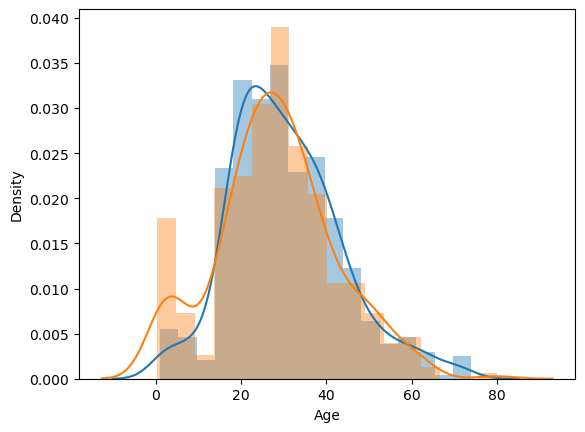

In [85]:
sns.distplot(train['Age'][train['Survived'] == 0])
sns.distplot(train['Age'][train['Survived'] == 1])

C:\Users\sumit\AppData\Local\Temp\ipykernel_25520\4152571307.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Fare'][train['Survived'] == 0])
C:\Users\sumit\AppData\Local\Temp\ipykernel_25520\4152571307.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Fare'][train['Survived']

<Axes: xlabel='Fare', ylabel='Density'>

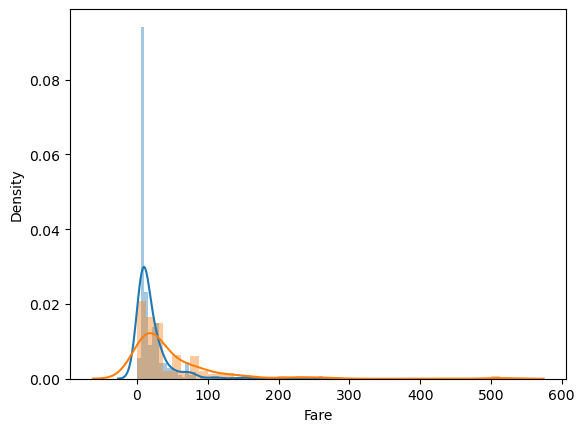

In [86]:
sns.distplot(train['Fare'][train['Survived'] == 0])
sns.distplot(train['Fare'][train['Survived'] == 1])

In [87]:
train.drop(columns = ['Ticket'],inplace = True)
test.drop(columns = ['Ticket'],inplace = True)

In [88]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [89]:
train['family'] = train['SibSp'] + train['Parch'] + 1

In [90]:
test['family'] = test['SibSp'] + test['Parch'] + 1

In [91]:
train.groupby('family')['Survived'].mean()

family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [92]:
def cal(number):
    if number == 1:
        return "Alone"
    elif number > 1 and number < 5:
        return "Medium"
    else:
        return "Large"  
    

In [93]:
train['family_size'] = train['family'].apply(cal)

In [94]:
test['family_size'] = test['family'].apply(cal)

In [95]:
train.drop(columns = ['SibSp','Parch','family'],inplace= True)




In [96]:
test.drop(columns = ['SibSp','Parch','family'],inplace= True)

In [97]:
 passengerId = test['PassengerId'].values

In [98]:
train.drop(columns = ['Name','PassengerId'],inplace= True)


In [99]:
test.drop(columns = ['Name','PassengerId'],inplace= True)


In [100]:
train.isna().sum()

Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
family_size    0
dtype: int64

In [102]:
train = pd.get_dummies(train,columns = ['Pclass','Sex','Embarked','family_size'],drop_first = True)

In [104]:
train.shape

(891, 10)

In [105]:
test = pd.get_dummies(test,columns = ['Pclass','Sex','Embarked','family_size'],drop_first = True)

In [106]:
test.shape

(418, 9)

# Model Building

In [107]:
X = train.iloc[:,1:].values
y = train.iloc[:,0].values

In [108]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [109]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()


In [110]:
classifier.fit(X_train,y_train)


DecisionTreeClassifier()

In [111]:
y_pred = classifier.predict(X_test)

In [112]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.7877094972067039

In [113]:
Xf = test.iloc[:,:].values

In [114]:
y_final = classifier.predict(Xf)

In [117]:
final = pd.DataFrame()

In [118]:
final['passengerId'] = passengerId
final['survived'] = y_final

In [119]:
final

,passengerId,survived
0,892,0
1,893,1
2,894,1
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [121]:
final.to_csv('submission.csv',index = False)